In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('alex-iby-cNgsAdd4-m4-unsplash.jpg')
image_2 = cv2.imread('jonathan-riley-VW8MUbHyxCU-unsplash.jpg')

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


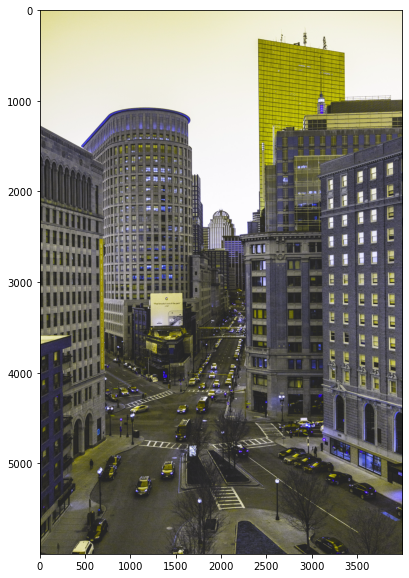

In [2]:
plt.figure(figsize=(16,10))
plt.imshow(image)

In [17]:
gray_scale = cv2.cvtColor(src = image, code=cv2.COLOR_BGR2GRAY)
gray_scale_2 = cv2.cvtColor(src = image_2, code=cv2.COLOR_BGR2GRAY)

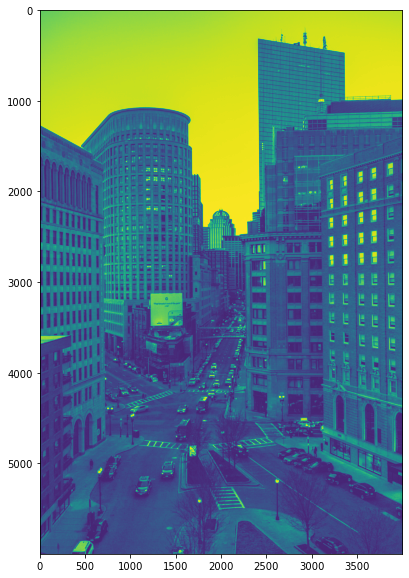

In [5]:
plt.figure(figsize=(16,10))
plt.imshow(gray_scale)

In [6]:
image_padded = np.zeros((image.shape[0] + 100 * 2, image.shape[1] + 100 * 2))

In [7]:
image_padded[int(100): int(-100), int(100): int(-100)] = gray_scale

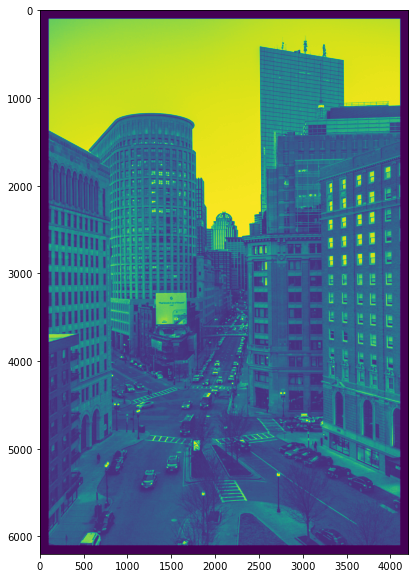

In [8]:
plt.figure(figsize=(16,10))
plt.imshow(image_padded)

In [27]:
kernel_1 = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]])
kernel_2 = np.array([[-1, -1, -1], [-1, 10, -1], [-2, -2, -2]])

In [19]:
def convolution(image, kernel, padding = 0, strides = 1):
    kernel = np.flipud(np.fliplr(kernel))
    
    image_x_size = image.shape[0]
    image_y_size = image.shape[1]
    kernel_x_size = kernel.shape[0]
    kernel_y_size = kernel.shape[1]
    
    
    x_out = int(((image_x_size + 2 * padding - kernel_x_size)/strides) + 1)
    y_out = int(((image_y_size + 2 * padding - kernel_y_size)/strides) + 1)
    
    output_image = np.zeros((x_out, y_out))
    print(output_image.shape)
    if padding != 0:
        padded_image = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
        padded_image[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        
    else:
        padded_image = image
        
    
    
    for y_pointer in range(padded_image.shape[1]):
        
        if y_pointer > padded_image.shape[1] - kernel_y_size:
            break
        if y_pointer % strides == 0:

            for x_pointer in range(padded_image.shape[0]):
                if x_pointer > padded_image.shape[0] - kernel_x_size:

                    break
                try:
                    if x_pointer & strides == 0:
                        output_image[x_pointer, y_pointer] = (kernel * padded_image[x_pointer: x_pointer + kernel_x_size,
                                                                   y_pointer: y_pointer + kernel_y_size]).sum()

                except:
                    break
                    
    plt.figure(figsize = (15,20))
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(padded_image)
    plt.subplot(1,3,3)
    plt.imshow(output_image)
    
    return output_image

            

(6018, 4018)


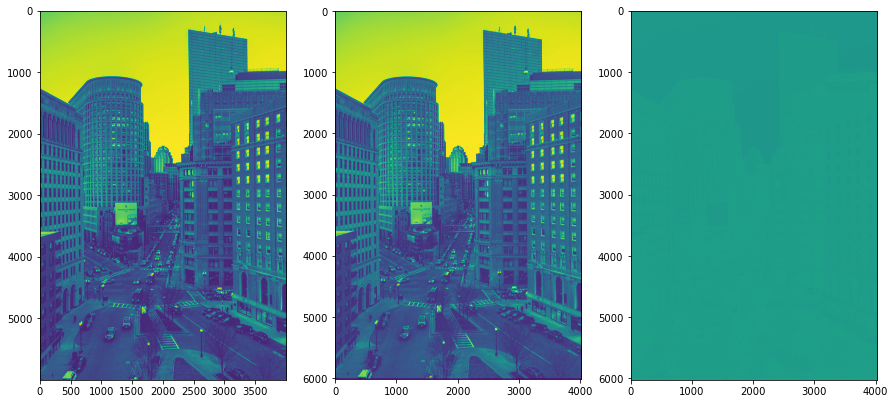

In [28]:
output_1 = convolution(gray_scale,kernel_2,padding= 10)

In [42]:
kernel_3 = np.array([[3, 3, 3],[-1, -1, -1],[3, 3, 3]])
gaussian = cv2.getGaussianKernel(3,3)
gaussian = np.outer(gaussian, gaussian.T)

(3011, 5198)


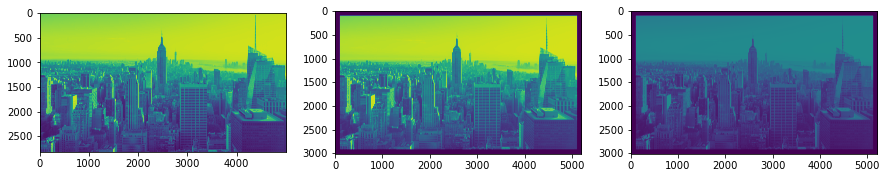

In [44]:
output_2 = convolution(gray_scale_2, gaussian, padding = 100)

In [45]:
# cv2.imwrite('kernel_1.jpg', output_1)
cv2.imwrite('kernel_2.jpg', output_2)

True